# 데이콘 심리성향 예측 대회

---

# 01 데이터 로드

In [54]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
train=pd.read_csv('/content/sample_data/dacon_train.csv')
test=pd.read_csv('/content/sample_data/dacon_test.csv')

In [56]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Machiavelli Score,wf_sum,wr_sum,wfr_sum,wfr_minus,tp_Sincerity,tp_Affinity,tp_Emotional Stability,tp_Experience Openess,tp_Extrovertness
0,3.0,363,4.0,1370,5.0,997,5.0,1024,2.0,1577,5.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,5,5,5,6,5,6,5,3,3,4,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95,0,7,7,-7,5.0,4.0,2.5,4.5,3.5
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,1.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,6,6,7,7,6,5,4,3,7,3,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60,0,8,8,-8,6.0,3.0,4.0,5.5,4.5
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,5.0,1333,1.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,5,4,6,2,4,3,5,1,6,4,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,2.40,1,10,11,-9,6.5,4.5,6.0,4.0,5.0
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,5,3,6,6,6,4,6,4,6,4,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.15,0,5,5,-5,5.0,5.5,4.0,5.0,4.5
4,5.0,927,1.0,707,5.0,556,4.0,1062,1.0,1014,2.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,6,6,6,1,7,5,7,1,5,1,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.30,1,11,12,-10,6.5,4.5,6.0,7.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,5.0,619,4.0,328,5.0,285,1.0,602,1.0,267,5.0,315,1.0,483,5.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,5.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,6,5,1,6,5,1,4,7,1,3,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3.55,1,10,11,-9,1.0,3.5,1.5,5.0,6.5
45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,2.0,560,4.0,640,1.0,1415,4.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,4.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,5,5,5,4,6,4,4,3,6,2,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,3.50,1,11,12,-10,5.0,3.5,5.0,6.0,4.5
45529,2.0,593,1.0,857,1.0,1047,2.0,1515,5.0,1690,4.0,1253,1.0,1094,1.0,1283,1.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,2.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,3,3,5,3,7,6,7,5,6,1,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,2.40,0,9,9,-9,4.0,6.0,5.5,7.0,2.5
45530,5.0,747,3.0,1331,4.0,892,4.0,1281,1.0,1328,1.0,599,5.0,650,1.0,1429,1.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,6,5,7,3,7,6,4,5,5,3,2,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,2.90,0,10,10,-10,5.0,3.5,5.0,6.0,4.0


In [57]:
train.shape

(45532, 87)

In [58]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness'],
      dtype='object')

In [59]:
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Machiavelli Score,wf_sum,wr_sum,wfr_sum,wfr_minus,tp_Sincerity,tp_Affinity,tp_Emotional Stability,tp_Experience Openess,tp_Extrovertness
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,3.870465,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,4.250922,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,3.439405,1.284608e+03,2.317952,4.584272e+03,2.842309,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,3.367104,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.575398,1.273324,2.593231,1.174251,1.389748,4.009817,4.409492,5.262014,3.988184,5.688351,4.554094,4.999649,3.533647,4.747957,2.718198,2.196807,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040,3.248872,0.361614,9.276443,9.638057,-8.914829,4.864183,4.295078,4.379887,5.485076,3.727862
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.904261,0.445671,1.458400,0.463783,0.637249,1.984570,1.863686,1.627052,2.008567,1.389552,1.969412,1.737109,1.950438,1.812482,1.716973,0.741225,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073,0.470709,0.690377,2.365986,2.624582,2.293597,1.510363,1.448597,1.678204,1.234298,1.748558
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.0000

In [60]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   QaA                     45532 non-null  float64
 1   QaE                     45532 non-null  int64  
 2   QbA                     45532 non-null  float64
 3   QbE                     45532 non-null  int64  
 4   QcA                     45532 non-null  float64
 5   QcE                     45532 non-null  int64  
 6   QdA                     45532 non-null  float64
 7   QdE                     45532 non-null  int64  
 8   QeA                     45532 non-null  float64
 9   QeE                     45532 non-null  int64  
 10  QfA                     45532 non-null  float64
 11  QfE                     45532 non-null  int64  
 12  QgA                     45532 non-null  float64
 13  QgE                     45532 non-null  int64  
 14  QhA                     45532 non-null

In [61]:
train['voted']

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [62]:
X = train.drop('voted', axis = 1)
y = train['voted']

학습데이터와 테스트데이터를 분류한 후 인코딩을 진행하겠습니다.

---

In [10]:
#PyCaret 패키지 설치 (Install PyCaret)
!pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 266kB 11.9MB/s 
     |████████████████████████████████| 276kB 12.6MB/s 
     |████████████████████████████████| 148.9MB 75kB/s 
     |████████████████████████████████| 174kB 48.0MB/s 
     |████████████████████████████████| 66.2MB 63kB/s 
     |████████████████████████████████| 1.6MB 43.4MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 1.8MB 40.5MB/s 
     |████████████████████████████████| 6.8MB 36.0MB/s 
     |████████████████████████████████| 13.9MB 309kB/s 
     |████████████████████████████████| 604kB 44.2MB/s 
     |████████████████████████████████| 71kB 312kB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 3.1MB 43.5MB/s 
     |████████████████████████████████| 2.1MB 44.9MB/s 
     |████████████████████████████████| 6.0MB 38.4MB/s 


In [11]:
#분류 작업에 필용한 함수 불러오기 (Import methods for classification task)
from pycaret.classification import *

PyCaret에서는 모델 학습 전 실험 환경을 구축 해주어야 합니다. setup 함수를 통해 환경을 구축할 수 있습니다.
setup 단계에서는 PyCaret이 자동으로 컬럼 형태를 인식합니다. 그 후 사용자에게 제대로 인식되었는지 확인을 받게 됩니다. 그 때 enter를 눌러주시면 됩니다.
또한 주어진 데이터의 얼마를 사용하여 train / validation을 구축할지 묻게 되는데, 전체 데이터를 사용하고 싶다면 enter 눌러주시면 됩니다.

In [63]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train, target = 'voted')

,Description,Value
0,session_id,1454
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 87)"
5,Missing Values,False
6,Numeric Features,46
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
!pip install --upgrade --user git+git://github.com/pycaret/pycaret.git

  Cloning git://github.com/pycaret/pycaret.git to /tmp/pip-req-build-wyfzlzrn
  Running command git clone -q git://github.com/pycaret/pycaret.git /tmp/pip-req-build-wyfzlzrn
  Created wheel for pycaret: filename=pycaret-2.2-cp36-none-any.whl size=266279 sha256=fc09b0a8f994b7616448ecdda15a196ff87e799ff6cc19f2d443b9385268645d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5u2uzm3s/wheels/73/39/5a/0fa5f9133a5170e56351147a5e32a951d5af957a615e10d221
Successfully built pycaret


In [64]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6949,0.7662,0.7005,0.7061,0.6951,0.3945,0.4007,24.744
catboost,CatBoost Classifier,0.6941,0.7650,0.6980,0.7020,0.6946,0.3908,0.3947,26.530
lda,Linear Discriminant Analysis,0.6939,0.7625,0.6971,0.7006,0.6945,0.3895,0.3927,1.807
lightgbm,Light Gradient Boosting Machine,0.6922,0.7625,0.6972,0.7022,0.6925,0.3883,0.3936,1.512
et,Extra Trees Classifier,0.6913,0.7599,0.6960,0.7006,0.6917,0.3862,0.3910,9.535
ada,Ada Boost Classifier,0.6897,0.7589,0.6933,0.6971,0.6902,0.3817,0.3852,5.137
rf,Random Forest Classifier,0.6888,0.7557,0.6937,0.6986,0.6891,0.3815,0.3866,9.431
xgboost,Extreme Gradient Boosting,0.6724,0.7437,0.6735,0.6763,0.6731,0.3443,0.3455,25.295
dt,Decision Tree Classifier,0.6107,0.6071,0.6071,0.6106,0.6106,0.2142,0.2143,1.777
nb,Naive Bayes,0.4545,0.5832,0.5003,0.5120,0.2970,0.0006,0.0030,0.120


In [65]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7031,0.7747,0.7076,0.7120,0.7035,0.4093,0.4140
1,0.6969,0.7684,0.7019,0.7068,0.6973,0.3977,0.4030
2,0.6905,0.7627,0.6949,0.6994,0.6909,0.3843,0.3888
3,0.7019,0.7716,0.7059,0.7099,0.7024,0.4064,0.4105
4,0.6850,0.7574,0.6881,0.6916,0.6856,0.3718,0.3747
Mean,0.6955,0.7670,0.6997,0.7039,0.6959,0.3939,0.3982
SD,0.0069,0.0062,0.0073,0.0075,0.0068,0.0141,0.0146


In [66]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6887,0.7643,0.6931,0.6975,0.6891,0.3809,0.3854


In [71]:
final_model = finalize_model(blended)
predictions = predict_model(final_model, data = test)
predictions

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Machiavelli Score,wf_sum,wr_sum,wfr_sum,wfr_minus,tp_Sincerity,tp_Affinity,tp_Emotional Stability,tp_Experience Openess,tp_Extrovertness,Label,Score
0,3.0,736.0,2.0,2941.0,3.0,4621.0,5.0,4857.0,2.0,2550.0,4.0,3171.0,1.0,3613.0,2.0,1494.0,2.0,1597.0,2.0,8891.0,5.0,2416.0,3.0,2043.0,3.0,3445.0,1.0,1232.0,3.0,1152.0,4.0,1447.0,3.0,798.0,4.0,1054.0,1.0,3462.0,2.0,1621.0,...,Christian_Protestant,5.0,6.0,6.0,3.0,6.0,5.0,5.0,4.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.75,0.0,6.0,6.0,-6.0,5.0,3.5,4.0,5.5,4.0,2,0.9546
1,3.0,514.0,2.0,1952.0,3.0,1552.0,3.0,821.0,4.0,1150.0,1.0,605.0,4.0,601.0,1.0,2370.0,1.0,2268.0,3.0,1759.0,5.0,771.0,5.0,1124.0,3.0,4525.0,5.0,559.0,2.0,988.0,3.0,1014.0,4.0,380.0,5.0,995.0,3.0,629.0,4.0,708.0,...,Christian_Catholic,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,2,0.9674
2,3.0,500.0,2.0,2507.0,4.0,480.0,4.0,614.0,2.0,1326.0,2.0,767.0,5.0,799.0,1.0,1309.0,4.0,3317.0,4.0,766.0,4.0,1940.0,5.0,926.0,4.0,568.0,4.0,608.0,5.0,669.0,3.0,2417.0,3.0,710.0,4.0,2781.0,3.0,1110.0,5.0,1073.0,...,Christian_Other,1.0,5.0,4.0,7.0,1.0,6.0,5.0,5.0,3.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.55,0.0,7.0,7.0,-7.0,3.5,4.0,2.0,1.5,1.5,2,0.8736
3,5.0,669.0,1.0,1050.0,5.0,1435.0,4.0,2252.0,5.0,2533.0,1.0,578.0,5.0,742.0,1.0,2886.0,5.0,1379.0,1.0,1392.0,3.0,2855.0,5.0,697.0,4.0,573.0,5.0,412.0,2.0,1076.0,4.0,1445.0,5.0,1069.0,1.0,847.0,4.0,1126.0,1.0,1240.0,...,Christian_Catholic,7.0,2.0,6.0,1.0,7.0,1.0,7.0,2.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.35,0.0,13.0,13.0,-13.0,6.0,6.5,6.5,7.0,7.0,2,0.7194
4,4.0,499.0,1.0,1243.0,5.0,845.0,4.0,1666.0,2.0,925.0,2.0,413.0,1.0,361.0,1.0,995.0,4.0,1427.0,3.0,1093.0,5.0,1201.0,4.0,1264.0,2.0,943.0,2.0,475.0,2.0,787.0,4.0,607.0,3.0,529.0,4.0,947.0,4.0,524.0,3.0,1945.0,...,Agnostic,1.0,6.0,5.0,5.0,4.0,7.0,2.0,5.0,3.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.00,0.0,10.0,10.0,-10.0,4.0,2.0,3.0,4.0,1.0,2,0.9578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,427.0,5.0,1066.0,5.0,588.0,5.0,560.0,2.0,1110.0,2.0,438.0,2.0,378.0,1.0,1616.0,3.0,1448.0,4.0,1886.0,4.0,852.0,5.0,872.0,2.0,526.0,3.0,381.0,4.0,818.0,2.0,736.0,4.0,828.0,2.0,1053.0,2.0,537.0,4.0,595.0,...,Christian_Catholic,6.0,7.0,7.0,4.0,7.0,3.0,6.0,7.0,3.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.10,0.0,9.0,9.0,-9.0,4.0,3.5,3.5,6.5,5.5,2,0.8296
11379,5.0,314.0,5.0,554.0,5.0,230.0,5.0,956.0,2.0,1173.0,1.0,414.0,5.0,637.0,1.0,1650.0,5.0,799.0,5.0,1220.0,1.0,548.0,5.0,630.0,5.0,366.0,5.0,287.0,4.0,543.0,5.0,505.0,3.0,554.0,1.0,600.0,5.0,307.0,4.0,722.0,...,Agnostic,5.0,7.0,5.0,7.0,7.0,1.0,7.0,7.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.85,2.0,13.0,15.0,-11.0,3.0,4.0,1.0,6.0,6.0,2,0.9686
11380,5.0,627.0,2.0,799.0,1.0,739.0,4.0,1123.0,1.0,829.0,2.0,370.0,4.0,430.0,4.0,1630.0,2.0,863.0,2.0,1452.0,4.0,712.0,4.0,1373.0,2.0,580.0,4.0,537.0,2.0,653.0,2.0,623.0,2.0,648.0,2.0,713.0,4.0,347.0,2.0,1171.0,...,Atheist,3.0,5.0,6.0,1.0,6.0,5.0,6.0,1.0,7.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.75,2.0,10.0,12.0,-8.0,6.5,4.5,7.0,6.0,3.0,2,0.7800
11381,4.0,539.0,1.0,2090.0,2.0,4642.0,5.0,673.0,2.0,1185.0,1.0,52

In [69]:
submission=pd.read_csv('/content/sample_data/sample_submission.csv', index_col=0)

In [72]:
submission['voted'] = predictions['Score']
submission.to_csv('/content/sample_data/submission_proba.csv', index = True)

In [92]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [93]:
train_ = pd.get_dummies(train)

In [94]:
y = train_['voted']
X = train_.drop('voted',axis=1)

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [99]:

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn import svm # support vector Machine
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics # accuracy measure(정확도)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [98]:
params={
    'max_depth':[1,3,5,10],
    'learning_rate':[0.5,1,3,5,10],
    'n_estimators':[1,3,5,10],
    'random_state':[1,3,5,10]
    }

LGBM_wrapper = LGBMClassifier()
grid_cv = GridSearchCV(LGBM_wrapper, param_grid=params,cv=5,n_jobs=-1,scoring='roc_auc')
grid_cv.fit(X_train,y_train)

cv_result=pd.DataFrame(grid_cv.cv_results_)

print('최적 하이퍼 파라미터와 예측 roc_auc 점수:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 roc_auc 점수: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10, 'random_state': 1} 0.7597057802520161


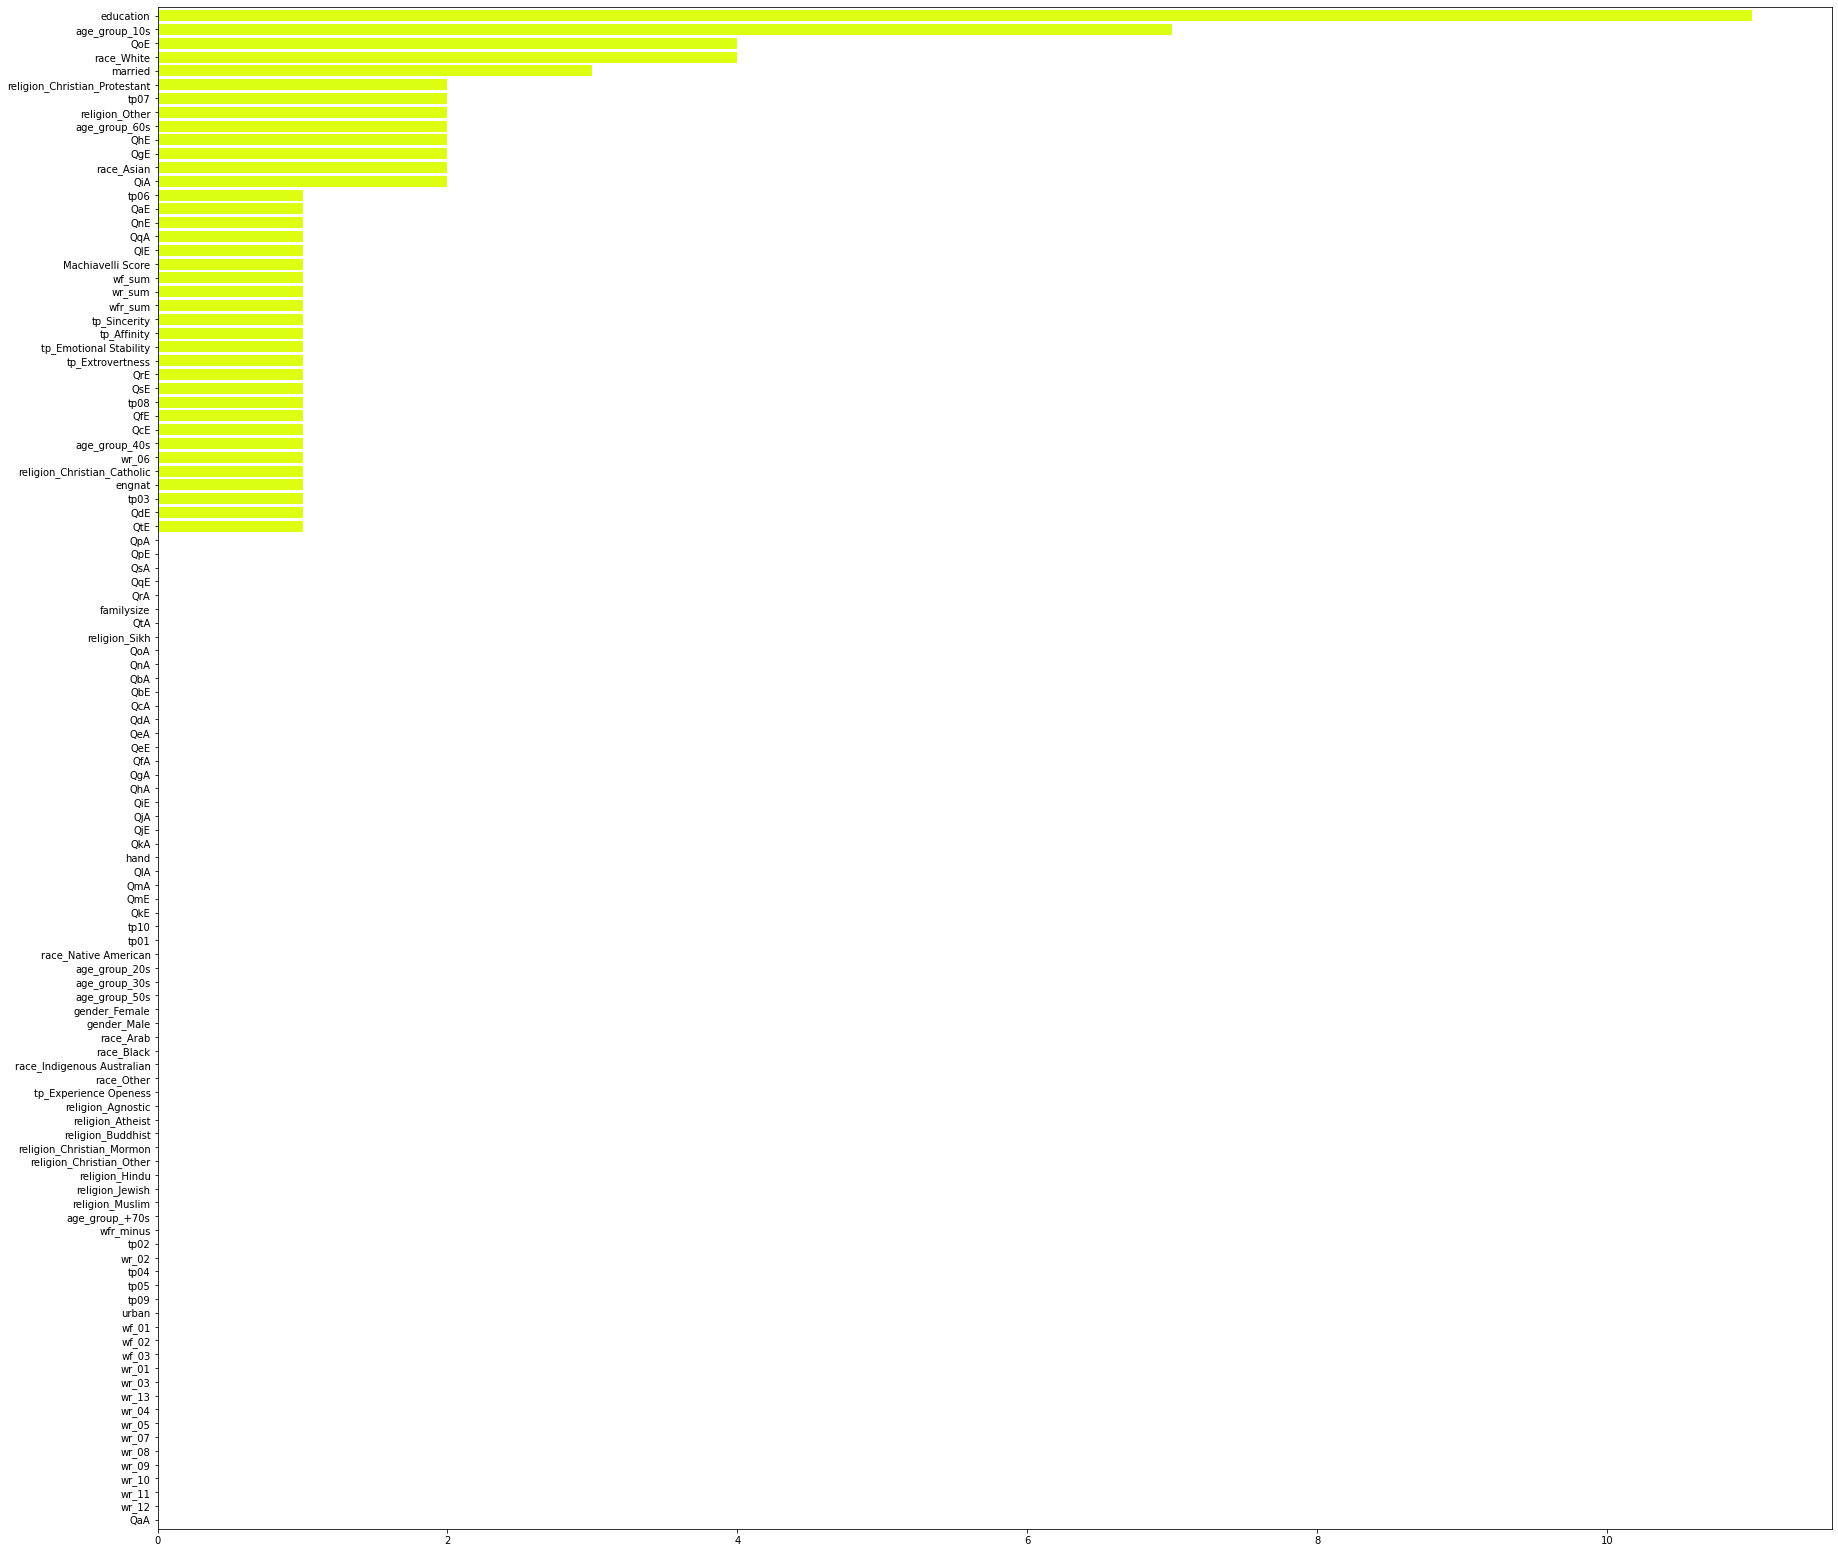

In [106]:
model=LGBMClassifier(learning_rate=0.5, max_depth=3, n_estimators=10)
model.fit(X_train,y_train)

pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,28) # fig그림 크기 조절
plt.show()